In [33]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
df = pd.read_csv('clean_data.csv')
df.head()

,user_name,user_location,date,text
0,Account2020,world,2021-04-25,bianca andreescu forced withdraw madrid open t...
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,2021-04-25,farce last year recognizing handful talent cont…
2,اکو انق ملايو جاتي,Malaysia,2021-04-25,brazil records new coronavirus cases additiona...
3,इmranS,"Hyderabad, India",2021-04-25,akbarowaisimim one point praying iss wabah ka ...
4,Meraj Wali AFRIDI,Lucknow,2021-04-25,uaetonight stand solidarity india prominent la...


In [35]:
df = df.dropna()

In [36]:
df=df.drop_duplicates(['text'])

In [37]:
sid = SentimentIntensityAnalyzer()
ps=lambda x:sid.polarity_scores(x)
sentiment_scores=df.text.apply(ps)

In [38]:
sentiment_df=pd.DataFrame(data=list(sentiment_scores))
display(sentiment_df)

,neg,neu,pos,compound
0,0.221,0.515,0.265,0.1531
1,0.257,0.476,0.267,0.0258
2,0.000,1.000,0.000,0.0000
3,0.000,0.828,0.172,0.3612
4,0.000,0.667,0.333,0.5423
...,...,...,...,...
149976,0.000,1.000,0.000,0.0000
149977,0.191,0.809,0.000,-0.3818
149978,0.000,1.000,0.000,0.0000
149979,0.000,1.000,0.000,0.0000


In [39]:
labelize=lambda x:'Neutral' if x==0 else('Positive' if x>0 else 'Negative')
sentiment_df['Sentiment']=sentiment_df.compound.apply(labelize)
sentiment_df.head(10)

,neg,neu,pos,compound,Sentiment
0,0.221,0.515,0.265,0.1531,Positive
1,0.257,0.476,0.267,0.0258,Positive
2,0.000,1.000,0.000,0.0000,Neutral
3,0.000,0.828,0.172,0.3612,Positive
4,0.000,0.667,0.333,0.5423,Positive
5,0.000,0.637,0.363,0.6908,Positive
6,0.000,0.505,0.495,0.5994,Positive
7,0.300,0.444,0.256,-0.1027,Negative
8,0.000,1.000,0.000,0.0000,Neutral
9,0.612,0.299,0.090,-0.8402,Negative


In [40]:
df['Sentiment_scores'] = df['text'].apply(lambda tweet: sid.polarity_scores(tweet))

In [41]:
df['compound'] = df['Sentiment_scores'].apply(lambda x:x['compound'])

In [42]:
df['Sentiment'] = df['compound'].apply(lambda score:'Neutral' if score==0 else('Positive' if score>0 else 'Negative'))

In [43]:
df

,user_name,user_location,date,text,Sentiment_scores,compound,Sentiment
0,Account2020,world,2021-04-25,bianca andreescu forced withdraw madrid open t...,"{'neg': 0.221, 'neu': 0.515, 'pos': 0.265, 'co...",0.1531,Positive
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,2021-04-25,farce last year recognizing handful talent cont…,"{'neg': 0.257, 'neu': 0.476, 'pos': 0.267, 'co...",0.0258,Positive
2,اکو انق ملايو جاتي,Malaysia,2021-04-25,brazil records new coronavirus cases additiona...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,इmranS,"Hyderabad, India",2021-04-25,akbarowaisimim one point praying iss wabah ka ...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.3612,Positive
4,Meraj Wali AFRIDI,Lucknow,2021-04-25,uaetonight stand solidarity india prominent la...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.5423,Positive
...,...,...,...,...,...,...,...
199995,Olala(金龙) 🇻🇳🇨🇳🇷🇺,world,2021-04-24,nearly people localities received shots april ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
199996,Gayathrimahes11,"Bengaluru South, India",2021-04-24,ways fight must teach children right way right...,"{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'comp...",-0.3818,Negative
199997,Richard Cole,"Guelph, Ontario",2021-04-24,ontario government house leader paul calandra ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
199998,JOHN WİCK,"İstanbul, Türkiye",2021-04-24,dog really said glazersout indianeedsoxygen co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


Neutral     57085
Positive    52579
Negative    40317
Name: Sentiment, dtype: int64


Text(0.5, 1.0, 'Over all Tweet Sentiment score results')

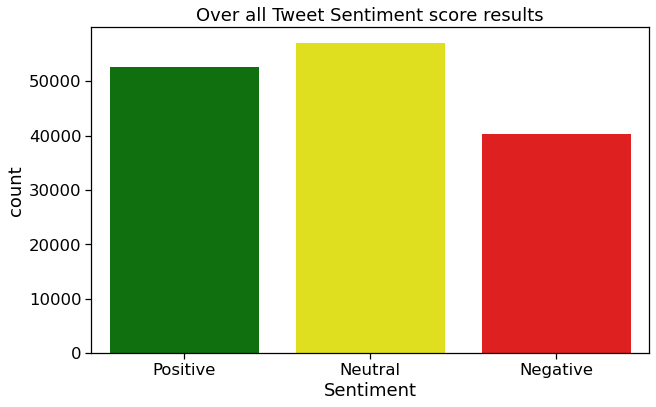

In [61]:
plt.figure(figsize=(10,6))
print(df['Sentiment'].value_counts())
sns.set_context(context='notebook',font_scale=1.5)
palette ={"Positive": "green", "Negative": "red", "Neutral": "yellow"}
sns.countplot(df['Sentiment'],palette=palette)
plt.title('Over all Tweet Sentiment score results')

In [50]:
# Top 12 country with their tweet sentiment score

US_compound_score    = df[df['user_location'].str.contains('United States',na=False)]['Sentiment']
India_compound_score = df[df['user_location'].str.contains('India',na=False)]['Sentiment']
China_compound_score = df[df['user_location'].str.contains('China',na=False)]['Sentiment']
United_Kingdom_score = df[df['user_location'].str.contains('United Kingdom',na=False)]['Sentiment']
Australia_score       = df[df['user_location'].str.contains('Australia',na=False)]['Sentiment']
South_Africa_score     =  df[df['user_location'].str.contains('South Africa',na=False)]['Sentiment']
Lagos_Nigeria_score     =  df[df['user_location'].str.contains('Lagos  Nigeria',na=False)]['Sentiment']
Philippines_score     =  df[df['user_location'].str.contains('Philippines',na=False)]['Sentiment']
Nairobi_Kenya_score     =  df[df['user_location'].str.contains('Nairobi  Kenya',na=False)]['Sentiment']
Switzerland_score     =  df[df['user_location'].str.contains('Switzerland',na=False)]['Sentiment']
Ireland_score     =  df[df['user_location'].str.contains('Ireland',na=False)]['Sentiment']
Singapore_score     =  df[df['user_location'].str.contains('Singapore',na=False)]['Sentiment']

In [51]:
sa = pd.DataFrame({'United_States':US_compound_score, 'India':India_compound_score, 'China':China_compound_score,'United_Kingdom':United_Kingdom_score,
                   'Australia':Australia_score, 'South_Africa':South_Africa_score,
                   'Philippines':Philippines_score,'Switzerland':Switzerland_score,'Ireland':Ireland_score,
                   'Singapore':Singapore_score})
                   
df_sa = pd.melt(sa)                 
                   
df_sa.columns = ['Country','Sentiment']

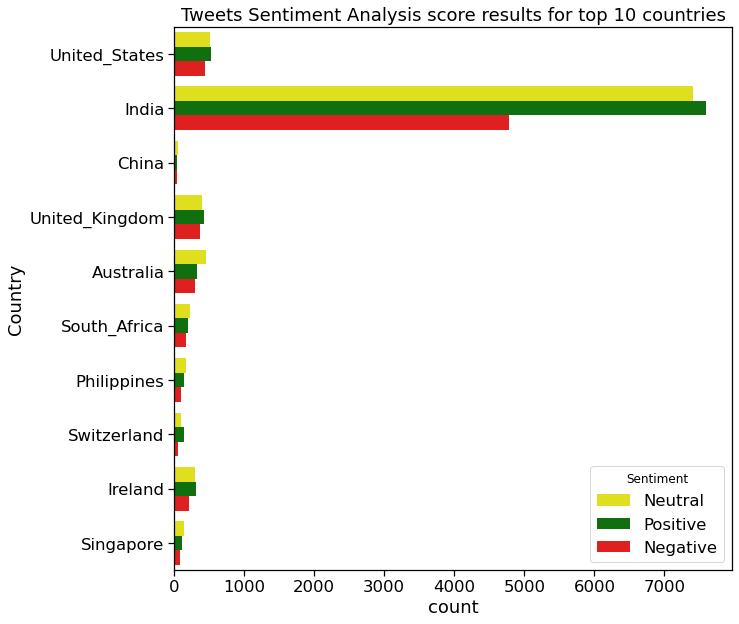

In [59]:
plt.figure(figsize=(10,10))
plt.title('Tweets Sentiment Analysis score results for top 10 countries')

sns.countplot(data=df_sa, y='Country', hue='Sentiment', palette=['yellow','green','red'])